In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap

In [2]:
moran_df = pd.read_csv('data/All_MoranI_combined.csv')
pathway_df = pd.read_csv('Task_Info_with_CRC_binary.csv')
moran_df = moran_df.merge(pathway_df[['Task', 'System' ,'Subsystem']], on='Task', how='left')
moran_df.rename(columns={'System':'Top-level Pathway','Subsystem': 'Detailed Pathway'}, inplace=True)
moran_df

,Task,I,pval_norm,var_norm,pval_norm_fdr_bh,Subject_ID,Treatment_Status,Optimal_k,I_z,Top-level Pathway,Detailed Pathway
0,Vesicle secretion,0.325686,0.0,0.000005,0.0,1182412B,Untreated,30,2.155230,Vesicle trafficking,Vesicle secretion
1,Trafficking to endosomes (Clathrin Vesicles),0.325686,0.0,0.000005,0.0,1182412B,Untreated,30,2.155230,Vesicle trafficking,Endosomal trafficking
2,Conversion of glutamate to glutamine,0.318488,0.0,0.000005,0.0,1182412B,Untreated,30,1.958420,AMINO ACIDS METABOLISM,GLUTAMATE METABOLISM
3,Tryptophan degradation,0.300394,0.0,0.000005,0.0,1182412B,Untreated,30,1.463685,AMINO ACIDS METABOLISM,TRYPTOPHAN METABOLISM
4,Linoleate degradation,0.293530,0.0,0.000005,0.0,1182412B,Untreated,30,1.275978,LIPIDS METABOLISM,FATTY ACID METABOLISM
...,...,...,...,...,...,...,...,...,...,...,...
2395,Inosine monophosphate synthesis (IMP),0.258335,0.0,0.000007,0.0,1185092B,Untreated,30,-1.378562,NUCLEOTIDE METABOLISM,IMP SYNTHESIS / PURINE METABOLISM
2396,Uridine triphosphate synthesis (UTP),0.258335,0.0,0.000007,0.0,1185092B,Untreated,30,-1.378562,NUCLEOTIDE METABOLISM,UMP SYNTHESIS
2397,Keratan sulfate biosynthesis from N-glycan,0.255996,0.0,0.000007,0.0,1185092B,Untreated,30,-1.395322,GLYCAN METABOLISM,KERATAN SULFATE METABOLISM
2398,Keratan sulfate biosynthesis from O-glycan (co...,0.255996,0.0,0.000007,0.0,1185092B,Untreated,30,-1.395322,GLYCAN METABOLISM,KERATAN SULFATE METABOLISM


In [3]:
moran_df.columns

Index(['Task', 'I', 'pval_norm', 'var_norm', 'pval_norm_fdr_bh', 'Subject_ID',
       'Treatment_Status', 'Optimal_k', 'I_z', 'Top-level Pathway',
       'Detailed Pathway'],
      dtype='object')

In [4]:
moran_df["I_z"] = moran_df.groupby("Subject_ID")["I"].transform(
    lambda x: 2 * (x - x.min()) / (x.max() - x.min()) - 1
)

### Mean Moran's I Normalized Analysis

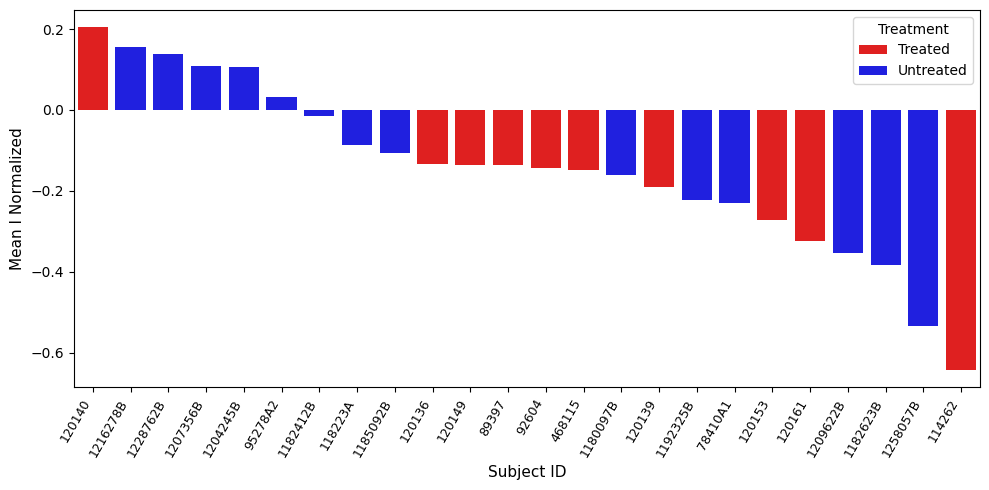

In [5]:
df_subject = (
    moran_df.groupby(["Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

order = (
    df_subject.groupby("Subject_ID")["I_z"]
    .mean()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Subject_ID",
    y="I_z",
    hue="Treatment_Status",
    data=df_subject,
    order=order,
    palette={"Treated": "red", "Untreated": "blue"}
)

plt.xticks(rotation=60, ha="right", fontsize=9)
plt.ylabel("Mean I Normalized", fontsize=11)
plt.xlabel("Subject ID", fontsize=11)
# plt.title("Average Moran’s I per Subject (Treated vs Untreated)", fontsize=13, pad=10)
plt.legend(title="Treatment", loc="upper right")
plt.tight_layout()
plt.show()

### Box-Plot 

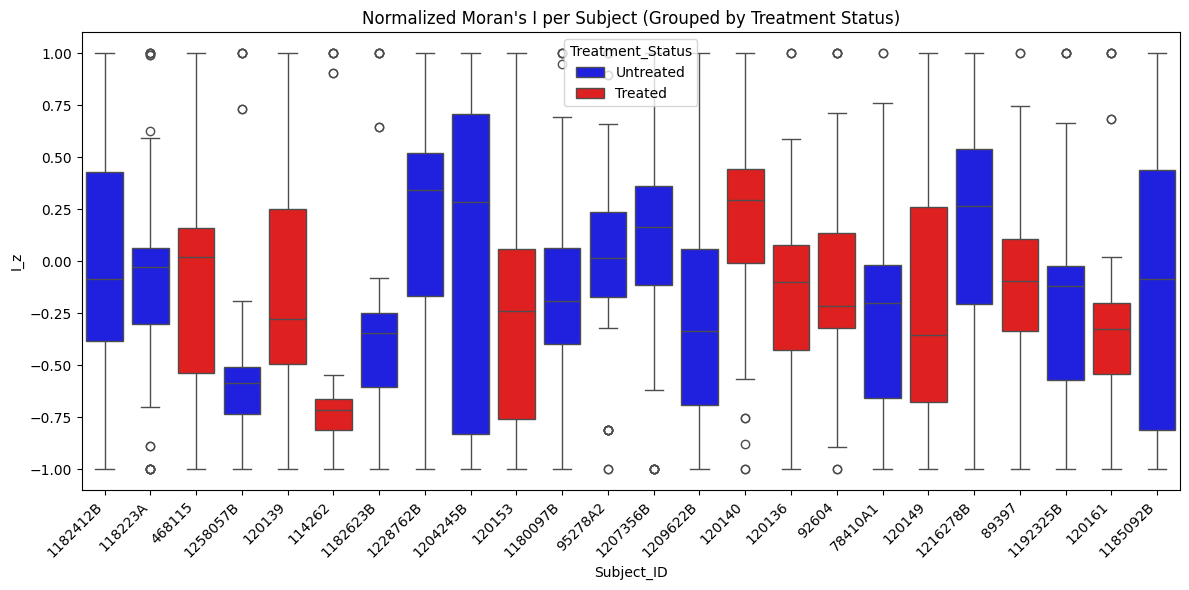

In [6]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=moran_df,
    x="Subject_ID",
    y="I_z",
    hue="Treatment_Status",
    palette={"Untreated": "blue", "Treated": "red"}
)

plt.xticks(rotation=45, ha='right')
plt.title("Normalized Moran's I per Subject (Grouped by Treatment Status)")
plt.tight_layout()
plt.show()


In [7]:
top_moran = moran_df[moran_df['I'].abs() >= 0.5].dropna().sort_values(by='I', ascending=False)
top_moran

,Task,I,pval_norm,var_norm,pval_norm_fdr_bh,Subject_ID,Treatment_Status,Optimal_k,I_z,Top-level Pathway,Detailed Pathway
500,Linolenate degradation,0.920260,0.0,0.000035,0.0,114262,Treated,30,1.000000,LIPIDS METABOLISM,FATTY ACID METABOLISM
502,Linoleate degradation,0.920260,0.0,0.000035,0.0,114262,Treated,30,1.000000,LIPIDS METABOLISM,FATTY ACID METABOLISM
501,gamma-Linolenate degradation,0.920260,0.0,0.000035,0.0,114262,Treated,30,1.000000,LIPIDS METABOLISM,FATTY ACID METABOLISM
503,cis-vaccenic acid degradation,0.920260,0.0,0.000035,0.0,114262,Treated,30,1.000000,LIPIDS METABOLISM,FATTY ACID METABOLISM
504,Elaidate degradation,0.886235,0.0,0.000035,0.0,114262,Treated,30,0.906354,LIPIDS METABOLISM,FATTY ACID METABOLISM
505,Palmitate degradation,0.886235,0.0,0.000035,0.0,114262,Treated,30,0.906354,LIPIDS METABOLISM,FATTY ACID METABOLISM
2300,Elaidate degradation,0.691271,0.0,0.000007,0.0,1185092B,Untreated,30,1.000000,LIPIDS METABOLISM,FATTY ACID METABOLISM
2301,Palmitate degradation,0.691271,0.0,0.000007,0.0,1185092B,Untreated,30,1.000000,LIPIDS METABOLISM,FATTY ACID METABOLISM
2302,Linoleate degradation,0.688100,0.0,0.000007,0.0,1185092B,Untreated,30,0.985432,LIPIDS METABOLISM,FATTY ACID METABOLISM
2303,cis-vaccenic acid degradation,0.688100,0.0,0.000007,0.0,1185092B,Untreated,30,0.985432,LIPIDS METABOLISM,FATTY ACID METABOLISM


### LogFC Analysis

/tmp/ipykernel_435487/3629193487.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


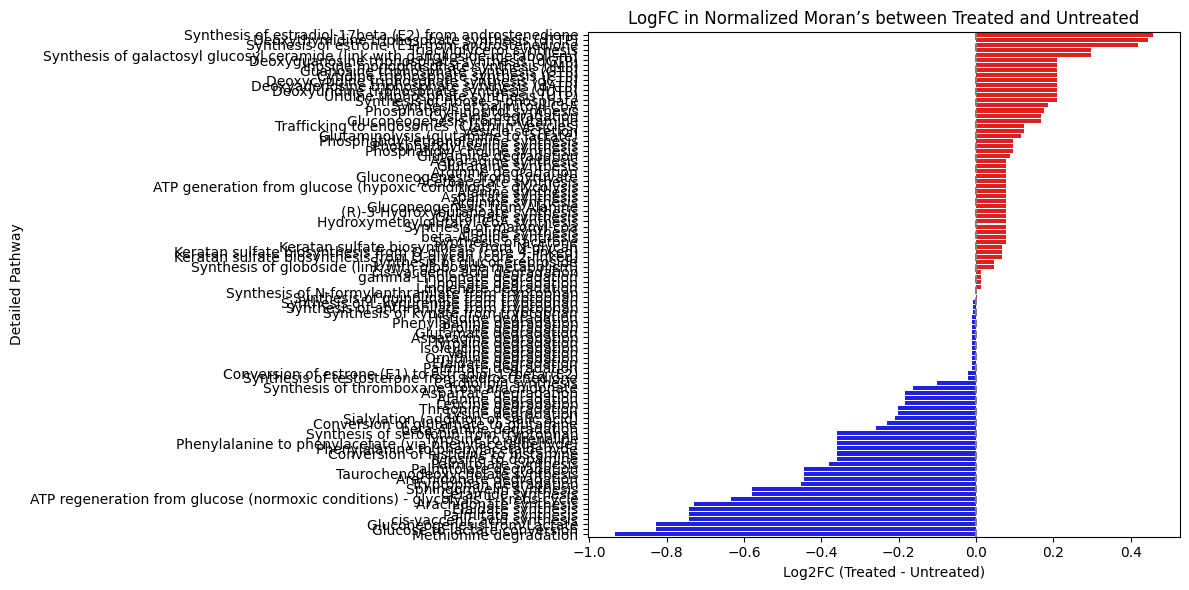

100

In [8]:
moran_df["I_abs"] = moran_df["I_z"].abs()

# Task, Top-level Pathway, Detailed Pathway

task_stats = (
    moran_df.groupby(["Task", "Treatment_Status"])["I_abs"]
    .mean()
    .reset_index()
    .pivot(index="Task", columns="Treatment_Status", values="I_abs")
)

eps = 1e-6
task_stats["logFC"] = np.log2((task_stats["Treated"] + eps) / (task_stats["Untreated"] + eps))

task_stats = task_stats.dropna(subset=["Treated", "Untreated"])

task_stats = task_stats.sort_values("logFC", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="logFC",
    y=task_stats.index, 
    data=task_stats, 
    palette=["red" if x > 0 else "blue" for x in task_stats["logFC"]]
)
plt.axvline(0, color="gray", linestyle="--")
plt.xlabel("Log2FC (Treated - Untreated)")
plt.ylabel("Detailed Pathway")
plt.title("LogFC in Normalized Moran’s between Treated and Untreated")
plt.tight_layout()
plt.show()

len(task_stats.index)


/tmp/ipykernel_435487/989414175.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


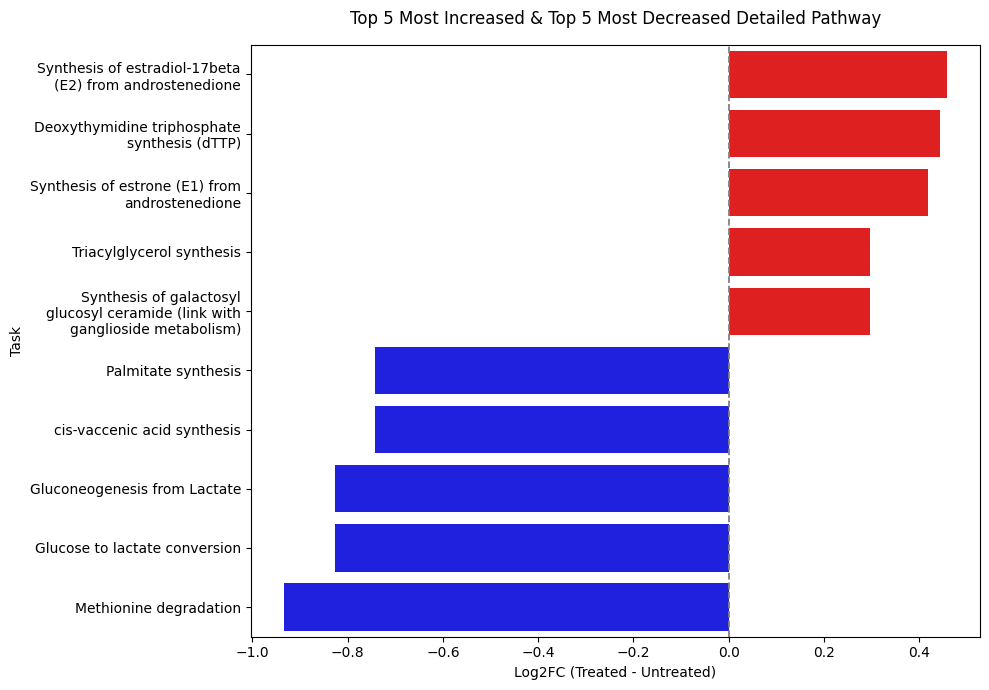

In [9]:
top5_up = task_stats.head(5)
top5_down = task_stats.tail(5)

top10 = pd.concat([top5_up, top5_down])

clean_labels = [
    "\n".join(textwrap.wrap(label, width=30))
    for label in top10.index
]

colors = ["red" if x > 0 else "blue" for x in top10["logFC"]]

plt.figure(figsize=(10, 7))

sns.barplot(
    x=top10["logFC"],
    y=clean_labels,
    palette=colors
)

plt.axvline(0, color="gray", linestyle="--", lw=1.3)
plt.xlabel("Log2FC (Treated - Untreated)")
plt.ylabel("Task")
plt.title("Top 5 Most Increased & Top 5 Most Decreased Detailed Pathway", pad=15)
plt.tight_layout()
plt.show()

### Heatmap Analysis

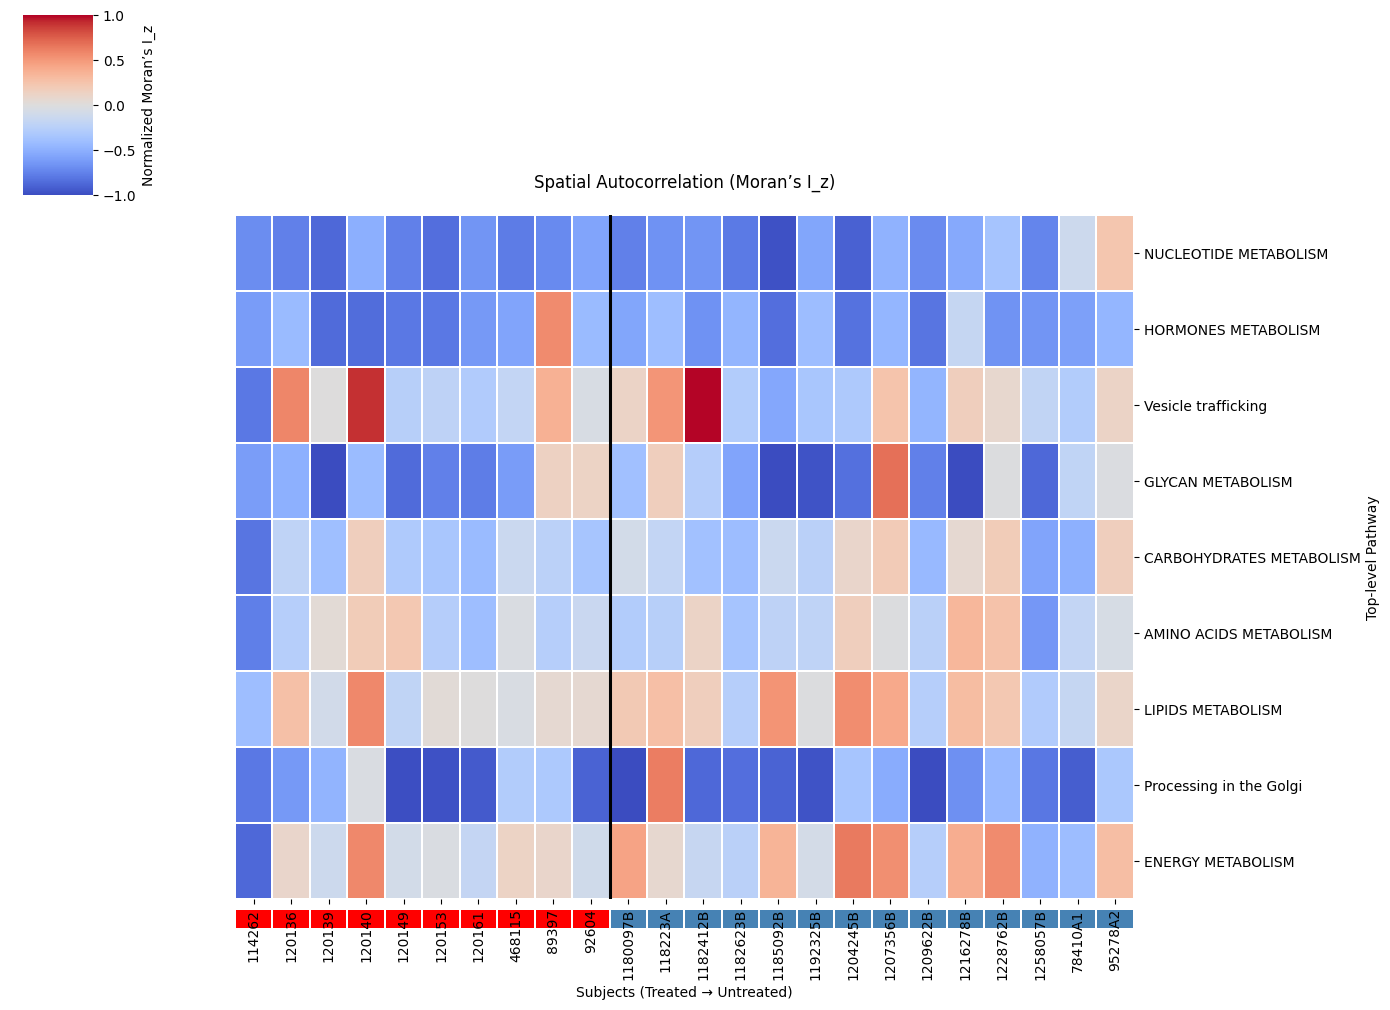

In [10]:
###### Top-level Pathway level Heatmap Analysis ############
heat_df = (
    moran_df.groupby(["Top-level Pathway", "Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

heat_pivot = heat_df.pivot_table(
    index="Top-level Pathway",
    columns=["Treatment_Status", "Subject_ID"],
    values="I_z"
)

task_stats = (
    moran_df.groupby(["Top-level Pathway", "Treatment_Status"])["I_abs"]
    .mean()
    .reset_index()
    .pivot(index="Top-level Pathway", columns="Treatment_Status", values="I_abs")
)

eps = 1e-6
task_stats["logFC"] = np.log2((task_stats["Treated"] + eps) / (task_stats["Untreated"] + eps))

task_stats = task_stats.dropna(subset=["Treated", "Untreated"])

ordered_pathways = task_stats.sort_values("logFC", ascending=False).index
heat_pivot = heat_pivot.loc[ordered_pathways]

treated_cols = [col for col in heat_pivot.columns if col[0] == "Treated"]
untreated_cols = [col for col in heat_pivot.columns if col[0] == "Untreated"]
heat_pivot = pd.concat([heat_pivot[treated_cols], heat_pivot[untreated_cols]], axis=1)

treatment_labels = ["Treated"] * len(treated_cols) + ["Untreated"] * len(untreated_cols)
palette = {"Treated": "red", "Untreated": "steelblue"}
col_colors = pd.Series(treatment_labels, index=heat_pivot.columns).map(palette)

new_labels = [col[1] for col in list(heat_pivot.columns)]
heat_pivot.columns = new_labels

g = sns.clustermap(
    heat_pivot,
    cmap="coolwarm",
    center=0,
    col_colors=[col_colors],
    col_cluster=False,
    row_cluster=False,
    linewidths=0.3,
    figsize=(14, 10),
    cbar_kws={"label": "Normalized Moran’s I_z"},
)

col_colors_ax = g.ax_col_colors
heatmap_ax = g.ax_heatmap
col_colors_ax.set_position([
    heatmap_ax.get_position().x0,
    heatmap_ax.get_position().y0 - 0.03,
    heatmap_ax.get_position().width,
    0.02
])

treated_count = len(treated_cols)
g.ax_heatmap.axvline(
    treated_count,
    color="black",
    lw=2.2,
    linestyle="-"
)

if g.ax_col_dendrogram.get_legend():
    g.ax_col_dendrogram.get_legend().remove()

g.ax_heatmap.set_xlabel("Subjects (Treated → Untreated)")
g.ax_heatmap.set_ylabel("Top-level Pathway")
g.ax_heatmap.set_title("Spatial Autocorrelation (Moran’s I_z)", pad=20)

plt.show()


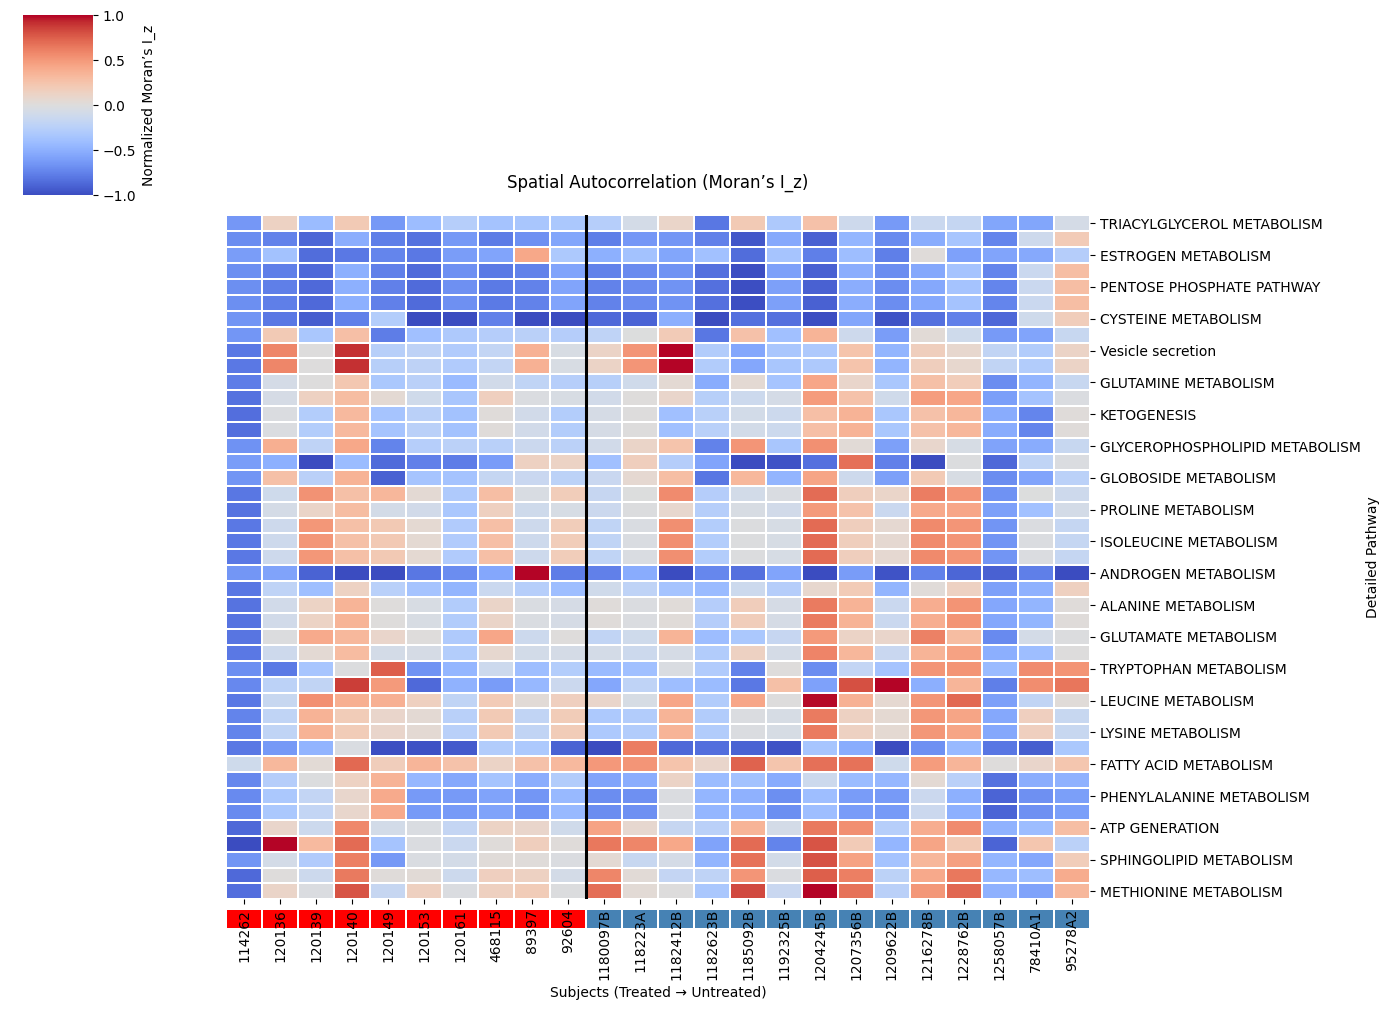

In [11]:
###### Detailed Pathway level Heatmap Analysis ############
heat_df = (
    moran_df.groupby(["Detailed Pathway", "Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

heat_pivot = heat_df.pivot_table(
    index="Detailed Pathway",
    columns=["Treatment_Status", "Subject_ID"],
    values="I_z"
)

task_stats = (
    moran_df.groupby(["Detailed Pathway", "Treatment_Status"])["I_abs"]
    .mean()
    .reset_index()
    .pivot(index="Detailed Pathway", columns="Treatment_Status", values="I_abs")
)

eps = 1e-6
task_stats["logFC"] = np.log2((task_stats["Treated"] + eps) / (task_stats["Untreated"] + eps))

task_stats = task_stats.dropna(subset=["Treated", "Untreated"])

ordered_pathways = task_stats.sort_values("logFC", ascending=False).index
heat_pivot = heat_pivot.loc[ordered_pathways]

treated_cols = [col for col in heat_pivot.columns if col[0] == "Treated"]
untreated_cols = [col for col in heat_pivot.columns if col[0] == "Untreated"]
heat_pivot = pd.concat([heat_pivot[treated_cols], heat_pivot[untreated_cols]], axis=1)

treatment_labels = ["Treated"] * len(treated_cols) + ["Untreated"] * len(untreated_cols)
palette = {"Treated": "red", "Untreated": "steelblue"}
col_colors = pd.Series(treatment_labels, index=heat_pivot.columns).map(palette)

new_labels = [col[1] for col in list(heat_pivot.columns)]
heat_pivot.columns = new_labels

g = sns.clustermap(
    heat_pivot,
    cmap="coolwarm",
    center=0,
    col_colors=[col_colors],
    col_cluster=False,
    row_cluster=False,
    linewidths=0.3,
    figsize=(14, 10),
    cbar_kws={"label": "Normalized Moran’s I_z"},
)

col_colors_ax = g.ax_col_colors
heatmap_ax = g.ax_heatmap
col_colors_ax.set_position([
    heatmap_ax.get_position().x0,
    heatmap_ax.get_position().y0 - 0.03,
    heatmap_ax.get_position().width,
    0.02
])

treated_count = len(treated_cols)
g.ax_heatmap.axvline(
    treated_count,
    color="black",
    lw=2.2,
    linestyle="-"
)

if g.ax_col_dendrogram.get_legend():
    g.ax_col_dendrogram.get_legend().remove()

g.ax_heatmap.set_xlabel("Subjects (Treated → Untreated)")
g.ax_heatmap.set_ylabel("Detailed Pathway")
g.ax_heatmap.set_title("Spatial Autocorrelation (Moran’s I_z)", pad=20)

plt.show()


/home/sadegh/python_projects/teesside/nanostring-cosmx-spatial-omics-modeling/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


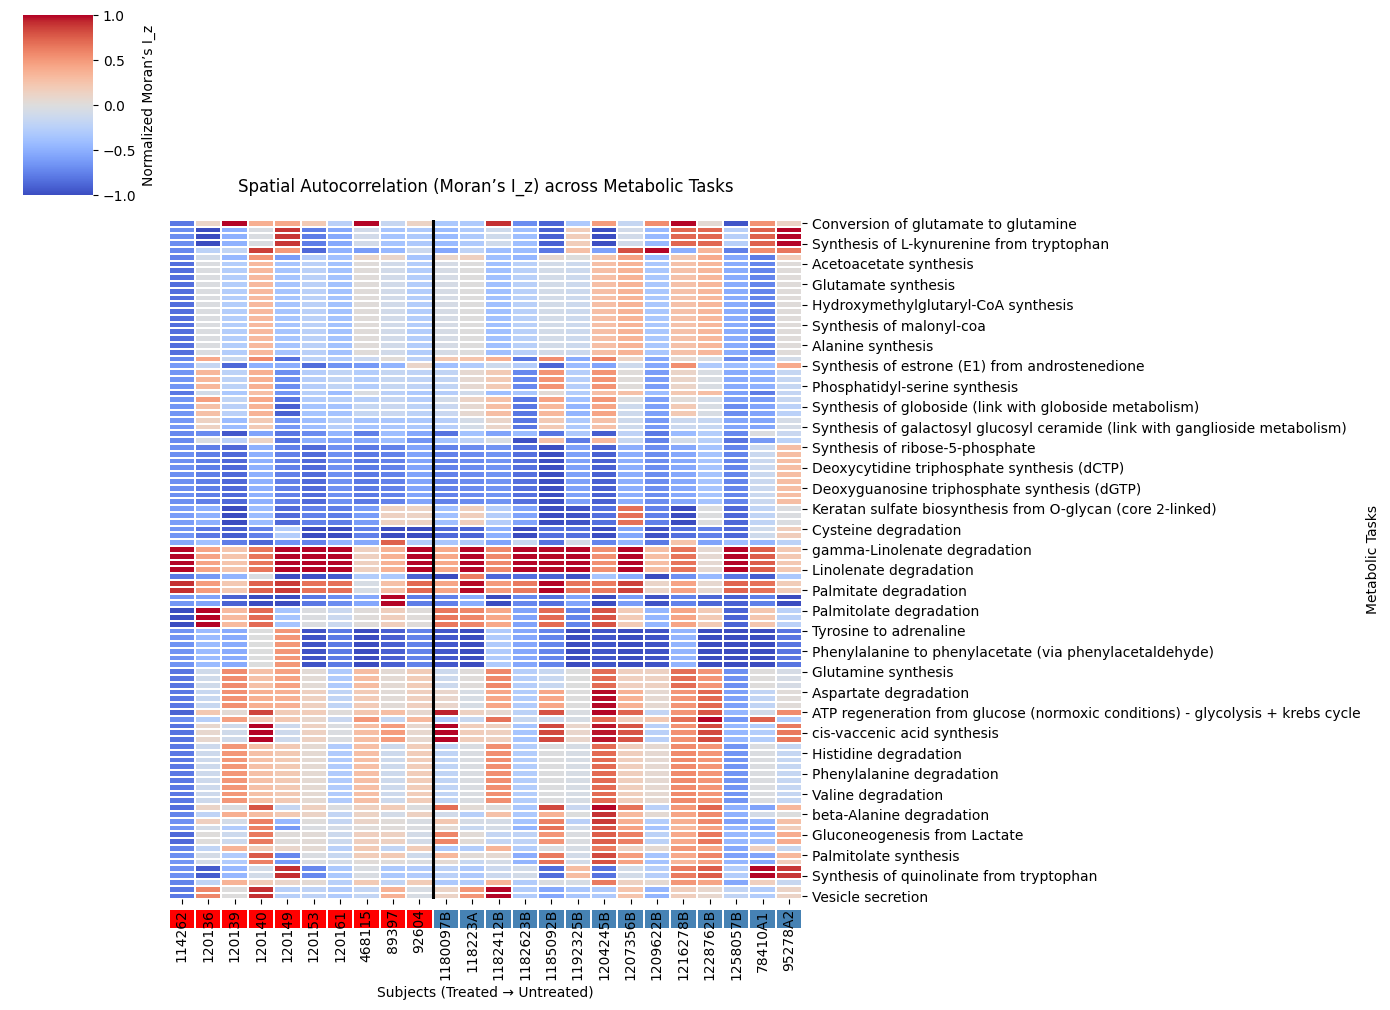

In [12]:
###### Task level Heatmap Analysis ############
task_order = (
    moran_df.groupby(["Task", "Treatment_Status"])["I_z"]
    .mean()
    .unstack()
)

# Handle missing values
task_order = task_order.dropna(subset=["Treated", "Untreated"])

# Step 2: compute logFC safely
eps = 1e-6
task_order["logFC"] = np.log2((task_order["Treated"] + eps) / (task_order["Untreated"] + eps))

# Step 3: order tasks by logFC
ordered_tasks = task_order.sort_values("logFC", ascending=False).index

# Step 4: build heatmap matrix (I_z values across subjects)
heat_df = (
    moran_df.groupby(["Task", "Subject_ID", "Treatment_Status"])["I_z"]
    .mean()
    .reset_index()
)

heat_pivot = heat_df.pivot_table(
    index="Task",
    columns=["Treatment_Status", "Subject_ID"],
    values="I_z"
)

# Keep tasks in desired order
heat_pivot = heat_pivot.loc[ordered_tasks.intersection(heat_pivot.index)]

# Separate Treated/Untreated columns
treated_cols = [col for col in heat_pivot.columns if col[0] == "Treated"]
untreated_cols = [col for col in heat_pivot.columns if col[0] == "Untreated"]

heat_pivot = pd.concat([heat_pivot[treated_cols], heat_pivot[untreated_cols]], axis=1)

# Column colors
treatment_labels = ["Treated"] * len(treated_cols) + ["Untreated"] * len(untreated_cols)
palette = {"Treated": "red", "Untreated": "steelblue"}
col_colors = pd.Series(treatment_labels, index=heat_pivot.columns).map(palette)

# Rename columns to show only subject IDs
heat_pivot.columns = [col[1] for col in heat_pivot.columns]

# Draw heatmap
g = sns.clustermap(
    heat_pivot,
    cmap="coolwarm",
    center=0,
    col_colors=[col_colors],
    col_cluster=False,
    row_cluster=False,
    linewidths=0.3,
    figsize=(14, 10),
    cbar_kws={"label": "Normalized Moran’s I_z"},
)

# Move the color bar
col_colors_ax = g.ax_col_colors
heatmap_ax = g.ax_heatmap
col_colors_ax.set_position([
    heatmap_ax.get_position().x0,
    heatmap_ax.get_position().y0 - 0.03,
    heatmap_ax.get_position().width,
    0.02
])

# Draw vertical line between Treated and Untreated
g.ax_heatmap.axvline(
    len(treated_cols),
    color="black",
    lw=2.2,
    linestyle="-"
)

# Labels
g.ax_heatmap.set_xlabel("Subjects (Treated → Untreated)")
g.ax_heatmap.set_ylabel("Metabolic Tasks")
g.ax_heatmap.set_title("Spatial Autocorrelation (Moran’s I_z) across Metabolic Tasks", pad=20)

plt.show()
